In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from skimage import io

##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
3440,00016972_017.png,No Finding,17,16972,043Y,F,AP,2500,2048,0.168,0.168
4072,00020080_003.png,No Finding,3,20080,018Y,M,AP,3056,2544,0.139,0.139
2138,00011021_022.png,No Finding,22,11021,072Y,F,AP,3056,2544,0.139,0.139


In [3]:
## EDA

#counting the amount of times a condition appears within the dataset.
labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
labels = [x for x in labels if len(x)>0]
for label in labels:
    if len(label)>1:
        all_xray_df[label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if label in finding else 0)

print (all_xray_df[labels].sum().sort_values(ascending=False)) 
        

No Finding            60361.0
Infiltration          19894.0
Effusion              13317.0
Atelectasis           11559.0
Nodule                 6331.0
Mass                   5782.0
Pneumothorax           5302.0
Consolidation          4667.0
Pleural_Thickening     3385.0
Cardiomegaly           2776.0
Emphysema              2516.0
Edema                  2303.0
Fibrosis               1686.0
Pneumonia              1431.0
Hernia                  227.0
dtype: float64


In [4]:
all_xray_df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
85232,00021012_002.png,Effusion,2,21012,50,F,PA,2762,2573,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74289,00018249_013.png,Effusion|Emphysema|Pleural_Thickening,13,18249,36,M,PA,2826,2991,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
93058,00023248_000.png,No Finding,0,23248,76,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
60806,00015018_001.png,Mass,1,15018,39,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
102178,00027213_008.png,Emphysema|Infiltration,8,27213,73,F,AP,3056,2544,0.139,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Patient demographics 

Text(0, 0.5, 'Number of encounters')

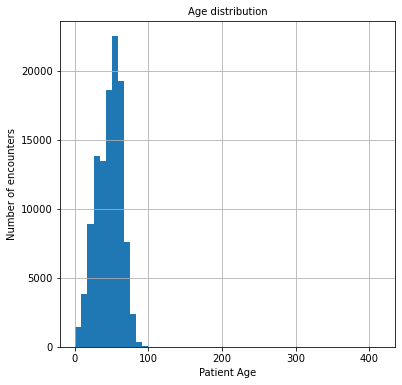

In [5]:
## Age distribution
plt.figure(figsize=(6,6))
all_xray_df["Patient Age"].hist(bins=50)
plt.title("Age distribution", fontsize=10)
plt.xlabel("Patient Age")
plt.ylabel("Number of encounters")

In [6]:
#the histogram indicates there are patients with an age higher than 100
all_xray_df = all_xray_df[(all_xray_df['Patient Age']<=100)]

Text(0, 0.5, 'Number of encounters')

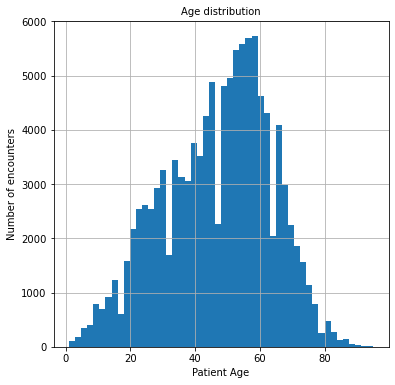

In [7]:
#Correct age distribution
plt.figure(figsize=(6,6))
all_xray_df["Patient Age"].hist(bins=50)
plt.title("Age distribution", fontsize=10)
plt.xlabel("Patient Age")
plt.ylabel("Number of encounters")

In [8]:
#the age distribution looks better now
#looking at the distribution 
all_xray_df['Patient Age'].describe()

count    112104.000000
mean         46.872574
std          16.598152
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max          95.000000
Name: Patient Age, dtype: float64

Gender distribution is 
 Male: 56.5% 
 Female: 43.5%


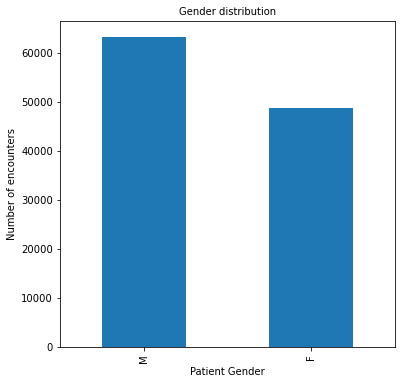

In [9]:
#Let's see the distibution of the patient's gender
plt.figure(figsize=(6,6))
all_xray_df["Patient Gender"].value_counts().plot(kind='bar')
plt.title("Gender distribution", fontsize=10)
plt.xlabel("Patient Gender")
plt.ylabel("Number of encounters")

M = all_xray_df[all_xray_df['Patient Gender']=='M']
F = all_xray_df[all_xray_df['Patient Gender']=='F']
print ('Gender distribution is \n Male: {:.1%} \n Female: {:.1%}'.format(len(M)/len(all_xray_df), len(F)/len(all_xray_df)))

### Xray view position

View position distribution is 
 PA: 60.03% 
 AP: 39.97%


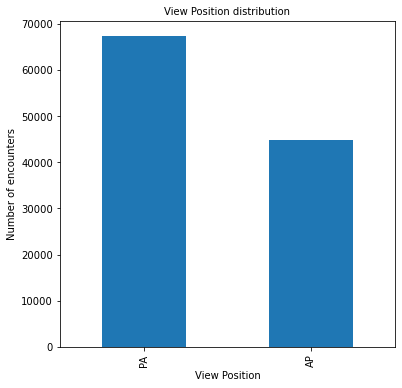

In [10]:
#Let's have a look at the view position of the images
plt.figure(figsize=(6,6))
all_xray_df["View Position"].value_counts().plot(kind='bar')
plt.title("View Position distribution", fontsize=10)
plt.xlabel("View Position")
plt.ylabel("Number of encounters")

PA = all_xray_df[all_xray_df['View Position']=='PA']
AP = all_xray_df[all_xray_df['View Position']=='AP']
print ('View position distribution is \n PA: {:.2%} \n AP: {:.2%}'.format(len(PA)/len(all_xray_df), len(AP)/len(all_xray_df)))


### Penumonia cases distribution

In [11]:
#time to check the distribution of Pneumonia and other conditions

prc = (all_xray_df[labels].sum()/len(all_xray_df))
prc.sort_values(ascending=False)
print('Pneumonia distribution is {:.2%}'.format(len(all_xray_df[all_xray_df.Pneumonia==1])/len(all_xray_df)))

#Number of pneumonia cases and non-pneumonia
count = 0
for label in all_xray_df['Finding Labels']:
    if "Pneumonia" in label:
        count +=1
print("Pneumonia cases: {}".format(count))
print("Other conditions {}".format(len(all_xray_df)-count))


Pneumonia distribution is 1.28%
Pneumonia cases: 1430
Other conditions 110674


### Pneumonia comorbidities

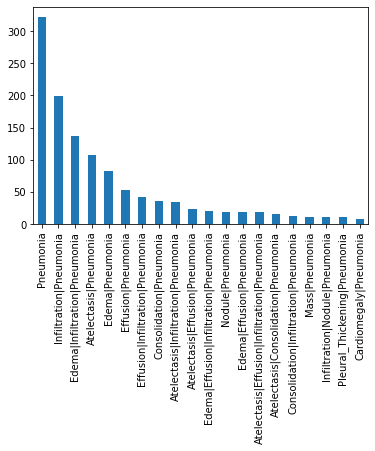

In [12]:
#Pneumonia Top 20 comorbidities
all_xray_df[all_xray_df['Pneumonia']==1]['Finding Labels'].value_counts()[0:20].plot(kind='bar')

### Diseases per patient

In [13]:
#Number of diseases per patient

NFexc_xray_df = all_xray_df[(all_xray_df['No Finding']==0)]

df = pd.DataFrame(columns = ['Labels', 'Single', 'Multiple'])
conditions = labels.copy()
conditions.remove('No Finding')


conditions_per_patient = NFexc_xray_df.groupby(['Patient ID'])[conditions].sum()
conditions_per_patient['total conditions'] = conditions_per_patient.astype('bool').sum(axis=1)
conditions_per_patient.sample(3)

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,total conditions
Patient ID,,,,,,,,,,,,,,,
18942,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,6
8350,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
16778,7.0,1.0,14.0,1.0,12.0,2.0,1.0,0.0,27.0,20.0,10.0,6.0,6.0,1.0,13


Text(0.5, 1.0, 'Distribution of conditions per patient')

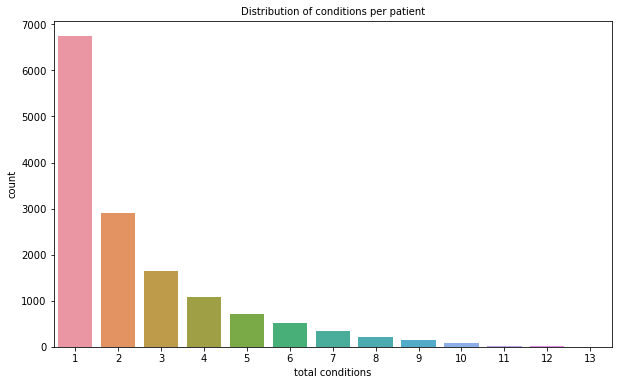

In [14]:
f, ax = plt.subplots(figsize=(10,6))
g = sns.countplot(x='total conditions', data=conditions_per_patient)
ax.set_title('Distribution of conditions per patient', fontsize=10)

### Pixel-level assessments

In [17]:


sample_labels = np.unique(list(chain(*sample_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
sample_labels = [x for x in sample_labels if len(x)>0]
for label in sample_labels:
    if len(label)>1:
        sample_df[label] = sample_df['Finding Labels'].map(lambda finding: 1.0 if label in finding else 0)

print (sample_df[labels].sum().sort_values(ascending=False)) 

No Finding            3044.0
Infiltration           967.0
Effusion               644.0
Atelectasis            508.0
Nodule                 313.0
Mass                   284.0
Pneumothorax           271.0
Consolidation          226.0
Pleural_Thickening     176.0
Cardiomegaly           141.0
Emphysema              127.0
Edema                  118.0
Fibrosis                84.0
Pneumonia               62.0
Hernia                  13.0
dtype: float64


In [18]:
images = glob("/data/images*/images/*.png")
images = {img.split('/')[-1]: img for img in images}

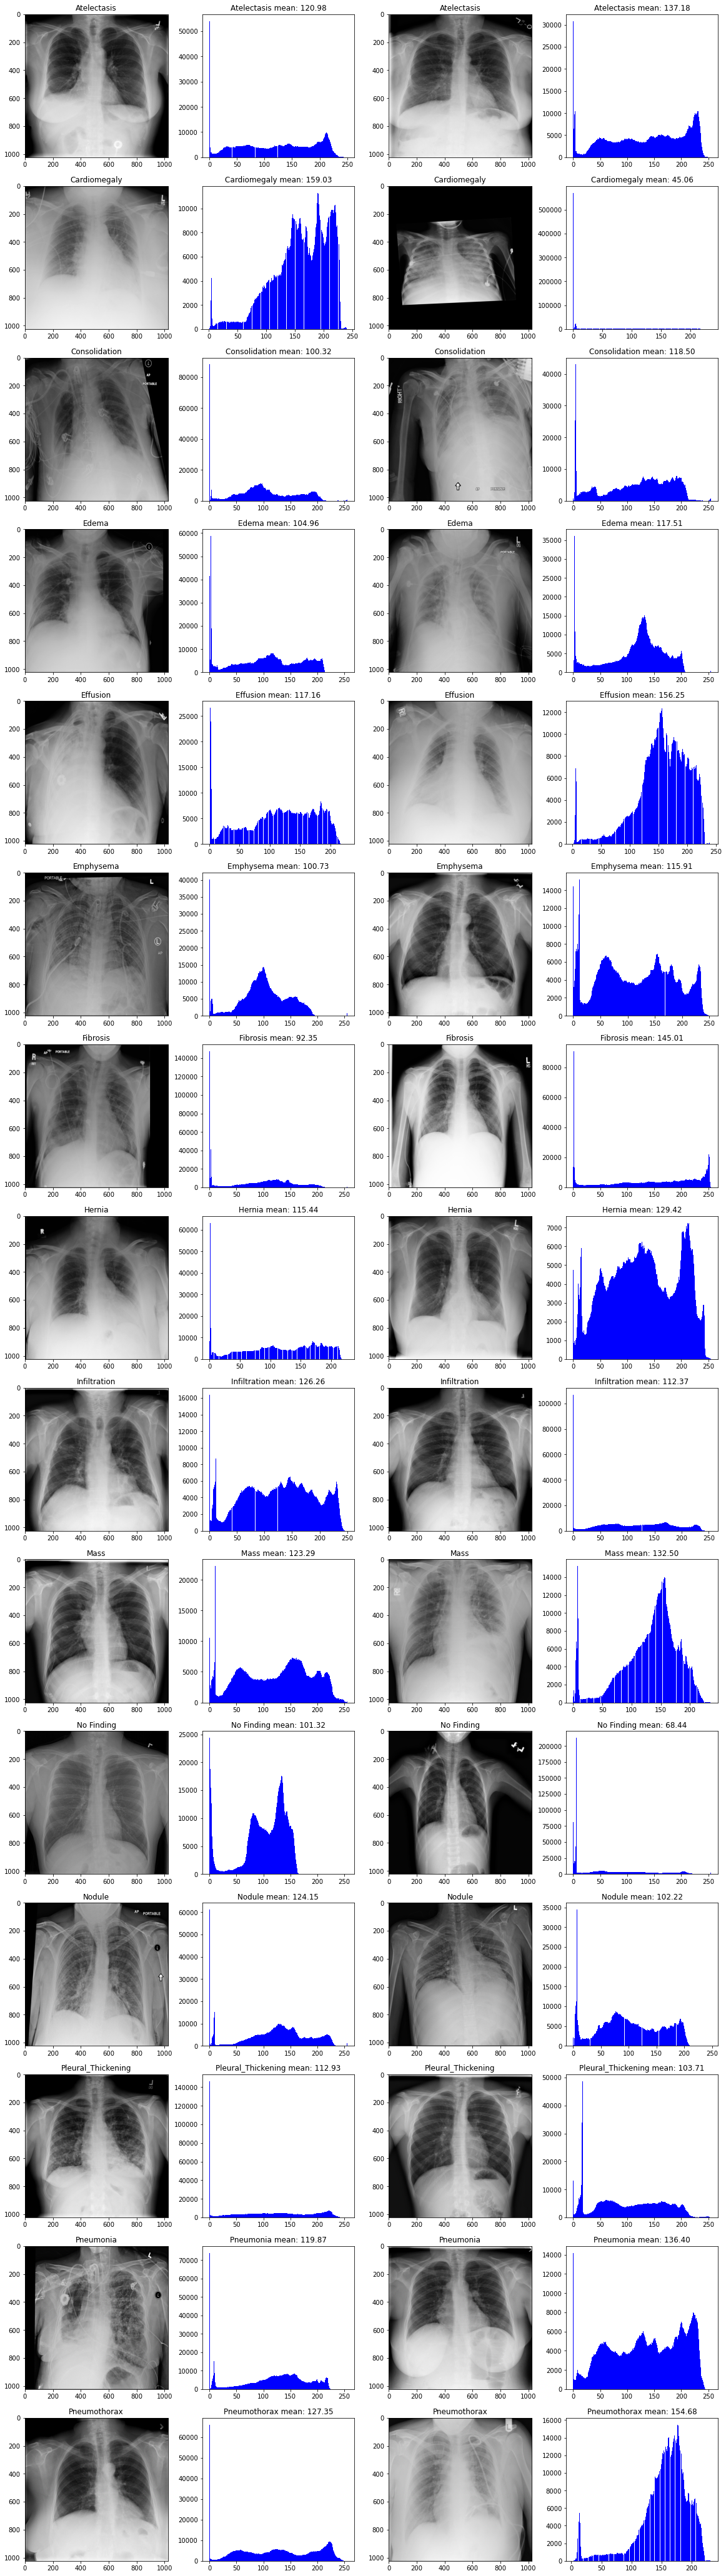

In [26]:
fig, axes = plt.subplots(ncols = 4, nrows=len(labels), figsize=(20, len(labels*5)))
for i, l in enumerate(labels):
    sample = sample_df.loc[sample_df['Finding Labels']==l].sample(2)
    ind = 0
    for j, (index, row) in enumerate(sample.iterrows()):
        orig_img = io.imread(images[row['Image Index']])
        axes[i, ind].imshow(orig_img, cmap='gray')
        axes[i, ind].set_title(l)
        axes[i, ind+1].hist(orig_img.ravel(), bins=256, color='blue')
        axes[i, ind+1].set_title('{} mean: {:.2f}'.format(l, np.mean(orig_img)))
        ind =+2